In [16]:
import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

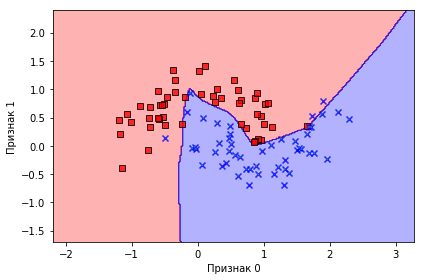

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.25, random_state=3)

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,random_state=42)
mlp = MLPClassifier(solver='lbfgs', random_state=0).fit(X_train, y_train)

#plt.contourf(mlp, X_train, fill=True, alpha=.3)
plot_decision_regions(X, y, classifier=mlp
                      #, test_idx=X
                     )
plt.scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.tight_layout()
plt.show()

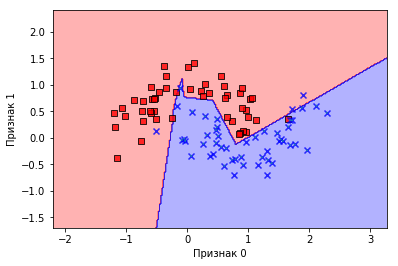

In [18]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[10])
mlp.fit(X_train, y_train)
plot_decision_regions(X, y, classifier=mlp
                      #, test_idx=X
                     )
plt.scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()

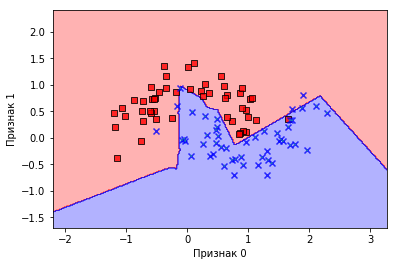

In [42]:
# использование двух скрытых слоев по 10 элементов в каждом
mlp = MLPClassifier(solver='lbfgs', random_state=0,
hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
plot_decision_regions(X, y, classifier=mlp
                      #, test_idx=X
                     )
plt.scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()

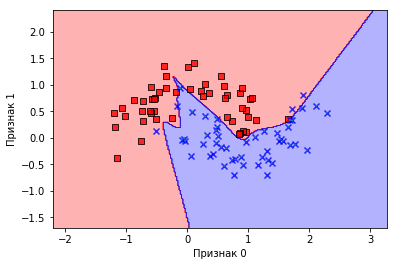

In [43]:
# использование двух скрытых слоев по 10 элементов в каждом, на этот раз с функцией tanh
mlp = MLPClassifier(solver='lbfgs', activation='tanh',
random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
plot_decision_regions(X, y, classifier=mlp
                      #, test_idx=X
                     )
plt.scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.xlabel("Признак 0")
plt.ylabel("Признак 1")
plt.show()

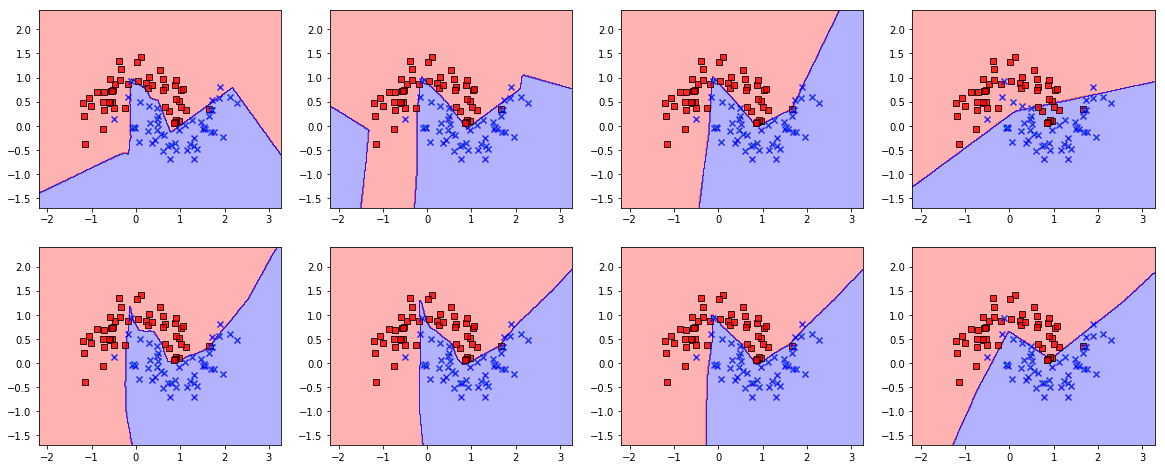

In [90]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
count = 0
for axx, n_hidden_nodes in zip(axes, [10, 100]):
    for ax, alpha in zip(axx, [0.0001, 0.01, 0.1, 1]):
        count = count + 1
        mlp = MLPClassifier(solver='lbfgs', random_state=0,
                            hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                            alpha=alpha)
        mlp.fit(X_train, y_train)
        plt.subplot(2,4,count)
        plot_decision_regions(X, y, classifier=mlp
                      #, test_idx=X
                     )
        plt.scatter(X_train[:, 0], X_train[:, 1], y_train)
        #plt.title("n_hidden=[{}, {}]\nalpha={:.4f}".format(
        #            n_hidden_nodes, n_hidden_nodes, alpha))
plt.show()

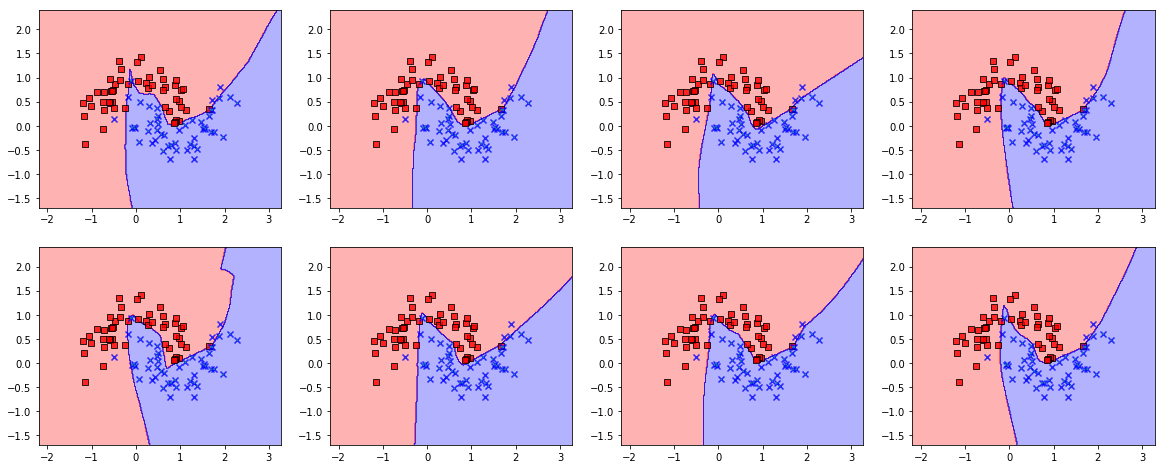

In [89]:
fig, axes = plt.subplots(2, 4, figsize=(20, 8))
count = 0
for i, ax in enumerate(axes.ravel()):
    count = count + 1
    mlp = MLPClassifier(solver='lbfgs', random_state=i,
                        hidden_layer_sizes=[100, 100])
    mlp.fit(X_train, y_train)
    plt.subplot(2,4,count)
    plot_decision_regions(X, y, classifier=mlp
                      #, test_idx=X
                     )
    plt.scatter(X_train[:, 0], X_train[:, 1], y_train)
plt.show()